In [1]:
import os
import sys
sys.path.append('../')

from library import Graph, GraphLib

In [2]:
graphLib = GraphLib(config='./config_test.yaml')
print(graphLib)

Graph Library with configurations:
{'dataset': 'CIFAR10', 'classes': 10, 'input_channels': 3, 'image_size': 224, 'data_dir': '/scratch/gpfs/stuli/pytorch_datasets/', 'manual_dir': None, 'models_dir': '/scratch/gpfs/stuli/cnnbench_models/', 'epochs': 200, 'train_batch_size': 128, 'test_batch_size': 128, 'optimizer': 'Adam', 'optimizer_args': {'lr': 0.0001, 'weight_decay': 0.0005}, 'scheduler': 'CosineAnnealingWarmRestarts', 'scheduler_args': {'T_0': 20}, 'module_vertices': 4, 'head_vertices': 4, 'max_edges': 9, 'max_modules': 2, 'base_ops': ['conv5x5-bn-relu', 'conv3x3-bn-relu', 'conv1x1-bn-relu', 'maxpool3x3'], 'default_channels': 128, 'default_stride': 1, 'flatten_ops': ['global-avg-pool', 'flatten'], 'dense_ops': ['dense-1024', 'dense-4096', 'dropout-p5', 'dropout-p4'], 'hash_algo': 'sha256'}
Number of graphs: 0


In [3]:
graphLib.build_library()

Generating modules...
Using 4 vertices, 4 labels, max 9 edges
	Generated up to 3 vertices: 8 modules (8 without hashing)
	Generated up to 4 vertices: 156 modules (168 without hashing)

Generating heads...
Using 4 vertices, 6 labels
	Generated up to 4 vertices: 2 heads (2 without hashing)

Generating graphs...
Using max 2 modules



	Generated up to 1 modules: 312 graphs



	Generated up to 2 modules: 48824 graphs
Graph library created! 
48824 graphs within the design space.


In [4]:
graphLib.save_dataset('./dataset.json')

Dataset saved to: ./dataset.json


In [10]:
graphLib_new = GraphLib.load_from_dataset('./dataset.json')
graphLib_new

Graph Library with configurations:
{'dataset': 'CIFAR10', 'classes': 10, 'input_channels': 3, 'image_size': 28, 'data_dir': '/scratch/gpfs/stuli/pytorch_datasets/', 'manual_dir': None, 'train_batch_size': 256, 'test_batch_size': 512, 'module_vertices': 4, 'head_vertices': 4, 'max_edges': 9, 'max_modules': 2, 'base_ops': ['conv5x5-bn-relu', 'conv3x3-bn-relu', 'conv1x1-bn-relu', 'maxpool3x3'], 'default_channels': 128, 'default_stride': 1, 'flatten_ops': ['global-avg-pool', 'flatten'], 'dense_ops': ['dense-1024', 'dense-4096', 'dropout-p5', 'dropout-p4'], 'hash_algo': 'sha256'}
Number of graphs: 48824

In [4]:
import sys
sys.path.append('../')

from library import Graph, GraphLib

graphLib = GraphLib.load_from_dataset('./dataset.json')

graphLib.library[-4]

Model parameters: None
Accuracies: {'train': None, 'val': None, 'test': None}
Embedding: None
Hash: 472f01d58a7b58e21baa454442e8540b5f95e63adef3d4f549488efdb35b86c1
Module:
[[0 1 1 1]
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 0]]
Labels:['input', 'maxpool3x3', 'maxpool3x3', 'output']
Module:
[[0 1 1 1]
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 0]]
Labels:['input', 'maxpool3x3', 'conv1x1-bn-relu', 'output']
Module:
[[0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 0]]
Labels:['input', 'global-avg-pool', 'dense_classes', 'output']

In [6]:
import sys
sys.path.append('../')

from library import Graph, GraphLib

from model_builder import CNNBenchModel

import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

graphLib = GraphLib.load_from_dataset('./dataset.json')

inp = torch.rand(64, 3, graphLib.config['image_size'], graphLib.config['image_size'])
inp = inp.to(device)

# for i in range(len(graphLib)):
#     model = CNNBenchModel(graphLib.config, graphLib.library[i])
#     model.to(device)
#     logits = model(inp)
#     print(f'\r{i}/{len(graphLib)}', end='')
model = CNNBenchModel(graphLib.config, graphLib.library[-1])
print(model)

CNNBenchModel(
  (op_m0_v1): MaxPool2d(kernel_size=(3, 3), stride=1, padding=0, dilation=1, ceil_mode=False)
  (proj_m0_v1): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (op_m0_v2): MaxPool2d(kernel_size=(3, 3), stride=1, padding=0, dilation=1, ceil_mode=False)
  (proj_m0_v2): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (proj_m0): Conv2d(3, 6, kernel_size=(1, 1), stride=(1, 1))
  (op_m1_v1): MaxPool2d(kernel_size=(3, 3), stride=1, padding=0, dilation=1, ceil_mode=False)
  (proj_m1_v1): Conv2d(6, 6, kernel_size=(1, 1), stride=(1, 1))
  (op_m1_v2): MaxPool2d(kernel_size=(3, 3), stride=1, padding=0, dilation=1, ceil_mode=False)
  (proj_m1_v2): Conv2d(6, 6, kernel_size=(1, 1), stride=(1, 1))
  (proj_m1): Conv2d(6, 12, kernel_size=(1, 1), stride=(1, 1))
  (op_m2_v2): Linear(in_features=43200, out_features=10, bias=True)
)


In [7]:
model.get_params()

4618390

In [ ]:
from model_trainer import worker

import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print('Training model:')
print(graphLib.library[1])
print()

worker(graphLib.config, graphLib.library[1], device)

In [3]:
import manual_models
from model_builder import CNNBenchModel
from utils import print_util as pu

model_name = 'efficientnet-b1'
model_graph = manual_models.get_manual_graph(graphLib.config, model_name)
cnn_model = CNNBenchModel(graphLib.config, model_graph)

In [3]:
import manual_models
from model_builder import CNNBenchModel
from utils import print_util as pu

for model_name in manual_models.SUPPORTED_MODELS:
    print(f'Tesing model: {model_name}')
    model_graph = manual_models.get_manual_graph(graphLib.config, model_name)
    cnn_model = CNNBenchModel(graphLib.config, model_graph)
    print(f'\tModel params: {pu.human_format(cnn_model.get_params())}')

Tesing model: lenet
	Model params: 91.26M
Tesing model: alexnet
	Model params: 76.22M
Tesing model: vgg11
	Model params: 103.20M
Tesing model: vgg13
	Model params: 103.39M
Tesing model: vgg16
	Model params: 109.13M
Tesing model: vgg19
	Model params: 114.86M
Tesing model: resnet18
	Model params: 12.50M
Tesing model: resnet34
	Model params: 24.30M
Tesing model: resnet50
	Model params: 62.69M
Tesing model: resnet101
	Model params: 126.29M
Tesing model: resnet152
	Model params: 178.68M
Tesing model: shufflenet
	Model params: 40.37M
Tesing model: mobilenet
	Model params: 11.95M
Tesing model: googlenet
	Model params: 25.79M
Tesing model: inception
	Model params: 25.79M
Tesing model: xception
	Model params: 63.75M
Tesing model: efficientnet-b0
	Model params: 10.39M
Tesing model: efficientnet-b1
	Model params: 16.92M
Tesing model: efficientnet-b2
	Model params: 20.56M
Tesing model: efficientnet-b3
	Model params: 28.88M
Tesing model: efficientnet-b4
	Model params: 44.91M
Tesing model: efficient

In [9]:
model_graph = manual_models.get_manual_graph(graphLib.config, 'resnet152')
cnn_model = CNNBenchModel(graphLib.config, model_graph)
print(cnn_model)

CNNBenchModel(
  (op_m0_v1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (proj_m0_v1): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (op_m0_v2): MaxPool2d(kernel_size=(3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
  (proj_m0_v2): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
  (proj_m0): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
  (op_m1_v1): Sequential(
    (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (proj_m1_v1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
  (op_m1_v2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

Loaded metrics from ../../results/manual_models/resnet101/metrics.json


Text(0.5, 1.0, 'Model: resnet101. Params: 126.29M. Time:  9.00h')

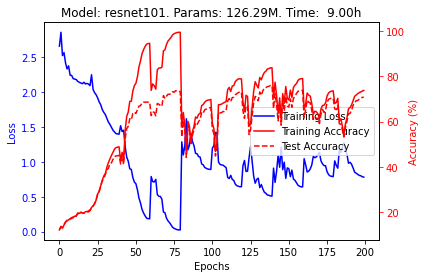

In [54]:
import json
from matplotlib import pyplot as plt
import sys

sys.path.append('../')

from utils import print_util as pu

model_name = 'resnet101'

metrics_path = f'../../results/manual_models/{model_name}/metrics.json'

with open(metrics_path, 'r', encoding='utf8') as json_file:
    metrics = json.load(json_file)
    print(f'Loaded metrics from {metrics_path}')

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

loss, = ax1.plot(metrics['epochs'], metrics['losses'], 'b-', label='Training Loss')

train_acc, = ax2.plot(metrics['epochs'], metrics['train_accuracies'], 'r-', label='Training Accuracy')
test_acc, = ax2.plot(metrics['epochs'], metrics['test_accuracies'], 'r--', label='Test Accuracy')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

ax2.set_ylabel('Accuracy (%)')

ax1.yaxis.label.set_color(loss.get_color())
ax2.yaxis.label.set_color(train_acc.get_color())

ax1.tick_params(axis='y', colors=loss.get_color())
ax2.tick_params(axis='y', colors=train_acc.get_color())

ax1.legend(handles=[loss, train_acc, test_acc], loc='center right')

plt.title(f'Model: {model_name}. Params: {pu.human_format(metrics["model_params"])}. Time: {metrics["times"][-1]/3600 : 0.2f}h')

Text(0, 0.5, 'Learning Rate')

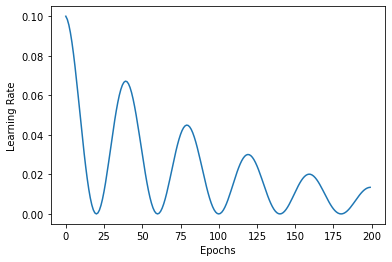

In [51]:
import torch
from torch.nn import Parameter
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
from matplotlib import pyplot as plt

EPOCHS = 200

model = [Parameter(torch.randn(2, 2, requires_grad=True))]

optimizer = optim.SGD(model, 0.1)

T_max = 20; gamma = 0.99
CosineAnnealingDecayLR = lambda epoch: 0.5 * (1 + np.cos(epoch * np.pi / T_max)) * gamma ** epoch 

scheduler1 = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=CosineAnnealingDecayLR)
# scheduler1 = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=20)

learning_rates = []

for epoch in range(EPOCHS):

    learning_rates.append(optimizer.param_groups[0]['lr'])

    optimizer.step()
    scheduler1.step()
    
plt.plot(np.arange(EPOCHS), learning_rates)
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')